In [ ]:
!wget https://github.com/phatjkk/data/raw/main/LLM/translate/train.en.txt
!wget https://github.com/phatjkk/data/raw/main/LLM/translate/train.vi.txt

--2023-08-19 12:43:13--  https://github.com/phatjkk/data/raw/main/LLM/translate/train.en.txt
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/phatjkk/data/main/LLM/translate/train.en.txt [following]
--2023-08-19 12:43:13--  https://raw.githubusercontent.com/phatjkk/data/main/LLM/translate/train.en.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13603614 (13M) [text/plain]
Saving to: ‘train.en.txt’

train.en.txt        100%[===================>]  12.97M  --.-KB/s    in 0.06s   

2023-08-19 12:43:13 (219 MB/s) - ‘train.en.txt’ saved [13603614/13603614]

--2023-08-19 12:43:13--  https://gith

In [ ]:
! pip install datasets transformers accelerate==0.21.0 sacrebleu git+https://github.com/huggingface/peft.git

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-iz2_ug76
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-iz2_ug76
  Resolved https://github.com/huggingface/peft.git to commit a4ca8fa3b646ae07f3d4e495271d97e7598412b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:

In [ ]:
from datasets import load_dataset
ds_en = load_dataset("text", data_files={"train": ["train.en.txt"]})
ds_vi = load_dataset("text", data_files={"train": ["train.vi.txt"]})
ds_vi["train"] = ds_vi["train"].add_column("labels", ds_en["train"]["text"])
ds = ds_vi["train"]
ds

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['text', 'labels'],
    num_rows: 133317
})

In [ ]:
ds["labels"][2]

'I &apos;d like to talk to you today about the scale of the scientific effort that goes into making the headlines you see in the paper .'

In [ ]:
def preprocess(text):
  text = text.replace('&apos;', "'")
  text = text.replace('&quot;', "'")
  text = text.replace('&#91;', "(")
  text = text.replace('&#93;', ")")
  return text

def clean_data(sample):
  sample["text"] = preprocess(sample["text"])
  sample["labels"] = preprocess(sample["labels"])
  return sample

# Cleaning
ds = ds.map(clean_data)

Map:   0%|          | 0/133317 [00:00<?, ? examples/s]

In [ ]:
ds["labels"][2]

"I 'd like to talk to you today about the scale of the scientific effort that goes into making the headlines you see in the paper ."

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

In [ ]:
max_input_length = 128
max_target_length = 128

def tokeni(examples):
    #Anh -> Viet
    model_inputs = tokenizer(examples["labels"],
                             text_target=examples["text"],
                             max_length=128,
                             truncation=True)
    #Viet -> Anh
    # model_inputs = tokenizer(examples["text"],
    #                       text_target=examples["labels"],
    #                       max_length=128,
    #                       truncation=True)
    return model_inputs

In [ ]:
tokenized_datasets = ds.map(tokeni,batched=True)

Map:   0%|          | 0/133317 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 133317
})

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# tokenized_datasets.push_to_hub("phatjk/ds_translate_vi_en_bart")
tokenized_datasets.push_to_hub("phatjk/ds_translate_en_vi_bart")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/134 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

# Training

In [ ]:
from datasets import load_dataset
# dataset_train = load_dataset("phatjk/ds_translate_vi_en_bart",split="train[:90%]")
# dataset_test = load_dataset("phatjk/ds_translate_vi_en_bart",split="train[90%:]")
dataset_train = load_dataset("phatjk/ds_translate_en_vi_bart",split="train[:90%]")
dataset_test = load_dataset("phatjk/ds_translate_en_vi_bart",split="train[90%:]")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/133317 [00:00<?, ? examples/s]

In [ ]:
dataset_train.num_rows

119985

In [ ]:
size_train = dataset_train.num_rows
size_test = dataset_test.num_rows

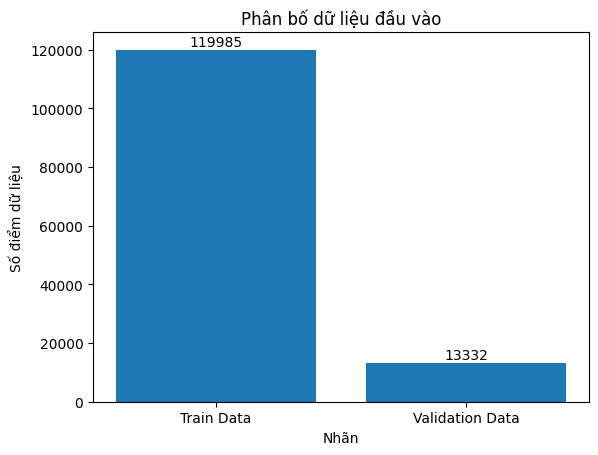

In [ ]:
import matplotlib.pyplot as plt

data = [size_train, size_test]
labels = ['Train Data', 'Validation Data']

plt.bar(labels, data)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Nhãn')
plt.ylabel('Số điểm dữ liệu')
plt.title('Phân bố dữ liệu đầu vào')
plt.show()


In [ ]:
tokenizer.decode(dataset_train[2]["labels"])

'<s>Tôi muốn cho các bạn biết về sự to lớn của những nỗ lực khoa học đã góp phần làm nên các dòng tít bạn thường thấy trên báo.</s>'

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large")
# model = AutoModelForSeq2SeqLM.from_pretrained("phatjk/vi_en_bart_translate")
model = AutoModelForSeq2SeqLM.from_pretrained("phatjk/en_vi_bart_translate")

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from datasets import load_metric
metric = load_metric("sacrebleu")

<ipython-input-7-523d71b03492>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("sacrebleu")


In [ ]:
import numpy as np

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
batch_size = 25
model_name = "bart-translate"
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    num_train_epochs=1,
    fp16=True,
    # report_to="wandb",
    # run_name="bart-en-vi"
)

In [ ]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Currently logged in as: autoittutorial1234. Use `wandb login --relogin` to force relogin


You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,0.676300,0.705533,0.981400,19.747700


TrainOutput(global_step=4800, training_loss=0.6453252760569255, metrics={'train_runtime': 4610.6599, 'train_samples_per_second': 26.023, 'train_steps_per_second': 1.041, 'total_flos': 1.64874016512e+16, 'train_loss': 0.6453252760569255, 'epoch': 1.0})

In [ ]:
# model.push_to_hub("phatjk/vi_en_bart_translate")
model.push_to_hub("phatjk/en_vi_bart_translate")

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/phatjk/en_vi_bart_translate/commit/439358dfeb6af94f879f295cd1090e349c955d07', commit_message='Upload BartForConditionalGeneration', commit_description='', oid='439358dfeb6af94f879f295cd1090e349c955d07', pr_url=None, pr_revision=None, pr_num=None)

# **RUN(CHẠY TỪ ĐÂY)**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

In [ ]:
!gsutil cp gs://vietai_public/best_vi_translation/v1/tst2013.* /content/data/

CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.


In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("phatjk/en_vi_bart_translate")

In [ ]:
model.num_parameters()

406291456

In [ ]:
!pip install datasets sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00


In [ ]:
!gsutil cp gs://vietai_public/best_vi_translation/v1/tst2013.* /content/

Copying gs://vietai_public/best_vi_translation/v1/tst2013.en...
Copying gs://vietai_public/best_vi_translation/v1/tst2013.en-vi.json...
Copying gs://vietai_public/best_vi_translation/v1/tst2013.vi...
| [3 files][762.3 KiB/762.3 KiB]                                                
Operation completed over 3 objects/762.3 KiB.                                    


In [ ]:
def preprocess(text):
  text = text.replace('&apos;', "'")
  text = text.replace('&quot;', "'")
  text = text.replace('&#91;', "(")
  text = text.replace('&#93;', ")")
  return text
with open("tst2013.en", 'r') as f:
    references = [[preprocess(line.strip()),] for line in f]

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model=model.to("cuda"),tokenizer=tokenizer,device="cuda")
translator("I am happy")[0]["translation_text"]


'Tôi hạnh phúc .'

In [ ]:
predictions = translator(references,max_length=128, batch_size=25)

In [ ]:
with open("tst2013.vi", 'r') as f:
  targets = [[preprocess(line.strip()),] for line in f]

In [ ]:
predictions[0]

[{'translation_text': "Khi còn nhỏ , tôi nghĩ đất nước của mình là nơi tuyệt vời như thế nào trên hành tinh , và từ đó lại lên ca hát ' Không có gì đùa lỗi . '"}]

In [ ]:
targets[0]

["Khi tôi còn nhỏ , Tôi nghĩ rằng BắcTriều Tiên là đất nước tốt nhất trên thế giới và tôi thường hát bài ' Chúng ta chẳng có gì phải ghen tị . '"]

In [ ]:
len(predictions),len(targets)

(1268, 1268)

In [ ]:
with open('bart_en_vi_13_predict.txt', 'w') as f:
  for item in predictions:
    f.write(item[0]["translation_text"] + '\n')


In [ ]:
with open("bart_en_vi_13_predict.txt", 'r') as f:
  predicts = [[preprocess(line.strip()),] for line in f]

In [ ]:
from datasets import load_metric
# Compute sacrebleu
metric = load_metric("sacrebleu")
print('sacreBLEU: %.2f' % metric.compute(predictions=predicts, references=targets)['score'])

sacreBLEU: 16.25


In [ ]:
translator("Happy")

[{'translation_text': 'Hạnh phúc'}]

In [ ]:
translator("I love you")

[{'translation_text': 'Tôi yêu bạn .'}]

In [ ]:
translator("I love history")

[{'translation_text': 'Tôi yêu lịch sử .'}]

In [ ]:
translator("A bird is flying")

[{'translation_text': 'Một con chim đang bay'}]

In [ ]:
translator("Today I go to school",max_length=128)

[{'translation_text': 'Hôm nay tôi đi học'}]

In [ ]:
# translator("Tôi đang ngồi chơi game",max_length=500)
translator("I am playing video game",max_length=500)

[{'translation_text': 'Tôi đang chơi một game video game'}]

In [ ]:
# from google.colab import runtime
# runtime.unassign()